# Proyecto 1 Reconocimiento de Patrones

José Julián Camacho Hernández

Leonardo Guillén Fernández

## Regresión Logística

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from numpy.random import seed
seed(42)


In [2]:
accuracy_data = []
precision_data = []
recall_data = []
auc_data = []

accuracy_data_sklearn = []
precision_data_sklearn = []
recall_data_sklearn = []
auc_data_sklearn = []

In [3]:
class LogisticRegressionN:
    def __init__(self, learning_rate=0.01, max_iter=60000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        # Inicializar los pesos
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradiente descendiente estocástico
        for i in range(self.max_iter):
            # Tomar una muestra aleatoria
            sample_index = np.random.choice(X.shape[0], 1)
            X_sample = X[sample_index]
            y_sample = y[sample_index]

            # Calcular la predicción y el error
            z = np.dot(X_sample, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            error = y_sample - y_pred

            # Actualizar los pesos
            self.weights += self.learning_rate * np.dot(X_sample.T, error)
            self.bias += self.learning_rate * np.sum(error)

    def predict(self, X):
        # Calcular la probabilidad de pertenecer a la clase positiva
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)

        # Convertir la probabilidad en una etiqueta de clase binaria
        return np.round(y_pred)

    def _sigmoid(self, z):
        # Función sigmoide
        return 1 / (1 + np.exp(-z))

### Set de datos Red Wine Quality

In [78]:
# Cargar los datos de red wine quality
data = pd.read_csv("winequality-red.csv")
data['quality'] = np.where(data['quality'] > 5, 1, 0)  # Convertir la calidad en un problema de clasificación binaria
print(data['quality'])
# Dividir los datos en conjunto de entrenamiento y prueba
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
# Crear los vectores de características y etiquetas de entrenamiento y prueba
X_train = train_data.drop(['quality'], axis=1).values
y_train = train_data['quality'].values
X_test = test_data.drop(['quality'], axis=1).values
y_test = test_data['quality'].values

# Entrenar el modelo de regresión logística
model = LogisticRegressionN()
model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

Exactitud: 0.7125
Precisión: 0.9074074074074074
Recall: 0.5444444444444444
AUC: 0.8517460317460317


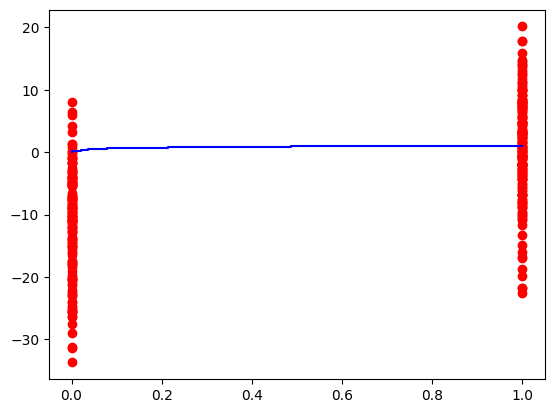

In [6]:

# Calcular la exactitud
accuracy_data.append(accuracy_score(y_test, y_pred))
print(f"Exactitud: {accuracy_data[0]}")

# Calcular la precisión
precision_data.append(precision_score(y_test, y_pred))
print(f"Precisión: {precision_data[0]}")

# Calcular el recall
recall_data.append(recall_score(y_test, y_pred))
print(f"Recall: {recall_data[0]}")

# Calcular el AUC
y_pred_proba = np.dot(X_test, model.weights) + model.bias
auc_data.append(roc_auc_score(y_test, y_pred_proba))
plt.scatter(y_test, y_pred_proba,color='red')

print(f"AUC: {auc_data[0]}")

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr,color='blue')

### Set de datos Notas de Arquitectura de Computadores 1

In [77]:
# Cargar los datos de Arquitectura 1
data_arquiI_2021_s1 = pd.read_csv("2021-s1.csv", delimiter=';')
data_arquiI_2021_s2 = pd.read_csv("2021-s2.csv", delimiter=';')
data_arquiI_2022_s1 = pd.read_csv("2022-s1.csv", delimiter=';')
data_arquiI_2022_s2 = pd.read_csv("2022-s2.csv", delimiter=';')

#=======  Feature Engineering  =======#

# Conservar solo features que se toman en cuenta de cada archivo
data_arquiI_2021_s1 = data_arquiI_2021_s1.loc[:, ['Examen 1 15.0%', 'Tarea 1 3.75%',
       'Proyecto Individual Funcional 11.25%','Proyecto Grupal 1 Funcional 13.12%', 'Total: ']]
data_arquiI_2021_s2 = data_arquiI_2021_s2.loc[:, ['Examen 1 15.0%', 'Tarea 1', 
       'Proyecto Individual Funcional 11.25%','Proyecto Grupal 1 Funcional 13.12%', 'Total: ']]
data_arquiI_2022_s1 = data_arquiI_2022_s1.loc[:, ['Examen parcial 1 15%', 'Tarea 1 evaluación 3.75%',
       'Proyecto Individual Funcional 11.25%','Proyecto Grupal 1 Funcional 13.12%', 'Total: ']]
data_arquiI_2022_s2 = data_arquiI_2022_s2.loc[:, ['Examen parcial 1 15%', 'Tarea 1 3.75%',
       'Proyecto Individual Funcional 11.25%','Proyecto Grupal 1 Func Eval 13.12%', 'Total: ']]

#Renombrar columnas para combinarlas
data_arquiI_2021_s1 = data_arquiI_2021_s1.rename(columns={'Examen parcial 1 15%': 'Examen 1 15.0%'})
data_arquiI_2021_s2 = data_arquiI_2021_s2.rename(columns={'Tarea 1': 'Tarea 1 3.75%'})
data_arquiI_2022_s1 = data_arquiI_2022_s1.rename(columns={'Examen parcial 1 15%': 'Examen 1 15.0%', 
                            'Tarea 1 evaluación 3.75%': 'Tarea 1 3.75%'})
data_arquiI_2022_s2 = data_arquiI_2022_s2.rename(columns={'Examen parcial 1 15%': 'Examen 1 15.0%', 
                            'Proyecto Grupal 1 Func Eval 13.12%': 'Proyecto Grupal 1 Funcional 13.12%'})

#Combinar todos los datos en un solo set
data_arquiI_combined = pd.concat([data_arquiI_2021_s1, data_arquiI_2021_s2,
                                  data_arquiI_2022_s1, data_arquiI_2022_s2], 
                                  axis=0, ignore_index=True)
#data_arquiI_combined.columns
#data_arquiI_combined['Examen 1 15.0%'] = data_arquiI_combined['Examen 1 15.0%'].astype('float64')
data_arquiI_combined = data_arquiI_combined.infer_objects()
data_arquiI_combined.dtypes
# Convertir la calidad en un problema de clasificación binaria
#data_arquiI_combined['Total: '] = np.where(data['Total: '] >= 67.5, 1, 0) 

#print(data['quality'])
## Dividir los datos en conjunto de entrenamiento y prueba
#train_data = data.sample(frac=0.8, random_state=42)
#test_data = data.drop(train_data.index)

Examen 1 15.0%                           object
Tarea 1 3.75%                            object
Proyecto Individual Funcional 11.25%     object
Proyecto Grupal 1 Funcional 13.12%       object
Total:                                  float64
dtype: object

### Set de datos Propio

## Árboles de decisión

In [7]:
# Función para dividir los datos en dos grupos en función de un valor de corte
def split_data(data, split_column, split_value):
    data_below = data[data[split_column] <= split_value]
    data_above = data[data[split_column] > split_value]
    return data_below, data_above

# Función para calcular la entropía de un conjunto de datos
def entropy(data, target_column):
    _, counts = np.unique(data[target_column], return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

# Función para calcular la ganancia de información al dividir un conjunto de datos en dos grupos
def information_gain(data, split_column, target_column):
    original_entropy = entropy(data, target_column)
    data_below, data_above = split_data(data, split_column, data[split_column].median())
    n = len(data)
    n_below = len(data_below)
    n_above = len(data_above)
    below_weight = n_below / n
    above_weight = n_above / n
    weighted_entropy = below_weight * entropy(data_below, target_column) + above_weight * entropy(data_above, target_column)
    information_gain = original_entropy - weighted_entropy
    return information_gain

# Función para encontrar el mejor atributo de división para un conjunto de datos
def find_best_split(data, target_column):
    information_gains = []
    for column in data.columns:
        if column == target_column:
            continue
        information_gain1 = information_gain(data, column, target_column)
        information_gains.append((column, information_gain1))
    best_split_column, best_information_gain = max(information_gains, key=lambda x: x[1])
    return best_split_column

# Función para crear un nodo de decisión en el árbol
def create_decision_node(data, target_column):
    # Si todos los valores en el conjunto de datos tienen la misma etiqueta, crear un nodo hoja
    if len(np.unique(data[target_column])) == 1:
        return data[target_column].iloc[0]
    
    # Si no hay más atributos para dividir, crear un nodo hoja con la etiqueta más común
    if len(data.columns) == 1:
        return np.bincount(data[target_column]).argmax()
    
    # Encontrar el mejor atributo de división para el conjunto de datos
    best_split_column = find_best_split(data, target_column)
    
    # Crear un nodo de decisión con el mejor atributo de división
    decision_node = {'split_column': best_split_column}
    median = data[best_split_column].median()
    decision_node['median'] = median
    
    # Dividir los datos en dos grupos
    data_below, data_above = split_data(data, best_split_column, median)
    
    # Recursivamente crear los hijos del nodo de decisión
    decision_node['below'] = create_decision_node(data_below, target_column)
    decision_node['above'] = create_decision_node(data_above, target_column)
    
    return decision_node

# Función para predecir la etiqueta de un ejemplo utilizando el árbol de decisión
def predict(example, decision_tree):
    if type(decision_tree) != dict:
        return decision_tree
    split_column = decision_tree['split_column']
    median = decision_tree['median']
    if example[split_column] <= median:
        return predict(example, decision_tree['below'])
    else:
        return predict(example, decision_tree['above'])


### Set de datos Red Wine Quality

In [8]:
# Leer los datos
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Dividir los datos en conjunto de entrenamiento y prueba
np.random.seed(0)
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Separar los predictores y las etiquetas
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']


In [9]:
# Crear el árbol de decisión a partir del conjunto de entrenamiento
decision_tree = create_decision_node(train_data, 'quality')

# Evaluar el árbol de decisión en el conjunto de prueba
y_pred = X_test.apply(lambda x: predict(x, decision_tree), axis=1)

In [10]:
# Calcular la precisión, recall y AUC
accuracy_data.append( accuracy_score(y_test, y_pred))
precision_data.append(precision_score(y_test, y_pred, average='weighted'))
recall_data.append(recall_score(y_test, y_pred, average='weighted'))
#auc_data.append(roc_auc_score(y_test, y_pred, multi_class='ovr'))

print(accuracy_data[1])
print(precision_data[1])
print(recall_data[1])
#print(auc_data[1])


0.628125
0.6129674238163412
0.628125


### Set de datos Notas de Arquitectura de Computadores 1

### Set de datos Propio

## KNN

In [11]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import time
from matplotlib import pyplot as plt

In [12]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='distance'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 2

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        #print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]
            #print("Sorted_neighs: ", sorted_neigh)
            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True) #Obtener distancias y vecinos
            neighbors = []
            neighbors = [self.y_train[i] for i in neigh_ind] #Obtener los tipos segun los indices de vecinos
            
            y_pred = []
            for i in range(len(neighbors)):
                distances = {}                              #Diccionario para guardar distancias por tipo
                for j in range(len(neighbors[i])):
                    neighbor_type = neighbors[i][j]         #Obtener tipo de vecino
                    distance = dist[i][j]                   #Obtener distancia a dicho vecino
                    if neighbor_type in distances:          #Guardar en el diccionario
                        distances[neighbor_type].append(distance)
                    else:
                        distances[neighbor_type] = [distance]
                
                average_distances = {}                      #Diccionario para guardar promedio de distancias
                for neighbor_type in distances:
                    average_distance = np.mean(distances[neighbor_type])
                    average_distances[neighbor_type] = average_distance

                #Obtener minima distancia promedio 
                min_distance_type = min(average_distances, key=average_distances.get)
                #print("El tipo {} tiene la mínima distacia promedio y es: {}".format(min_distance_type, average_distances[min_distance_type]))
                y_pred.append(min_distance_type)

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


### Set de datos Red Wine Quality

In [13]:

data = pd.read_csv("winequality-red.csv")
data['quality'] = np.where(data['quality'] > 5, 1, 0)  
print(data['quality'])
# Dividir los datos en conjunto de entrenamiento y prueba
train_data = data.sample(frac=0.8, random_state=45)
test_data = data.drop(train_data.index)


X_train = train_data.drop(['quality'], axis=1).values
y_train = train_data['quality'].values
X_test = test_data.drop(['quality'], axis=1).values
y_test = test_data['quality'].values



0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [14]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()


#Instanciar clasificadores
distance_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=5)
    

distance_accuracy, y_pred, y_test = distance_classifier.score(X_test, y_test)

print(distance_accuracy)


NameError: name 'X' is not defined

In [ ]:
# Calcular la precisión, recall y AUC
accuracy_data.append( distance_accuracy)
precision_data.append(precision_score(y_test, y_pred, average='weighted'))
recall_data.append(recall_score(y_test, y_pred, average='weighted'))
#auc_data.append(roc_auc_score(y_test, y_pred, multi_class='ovr'))

print(accuracy_data[1])
print(precision_data[1])
print(recall_data[1])
#print(auc_data[1])

0.628125
0.6129674238163412
0.628125


### Set de datos Notas de Arquitectura de Computadores 1

### Set de datos Propio

## Comparación con sklearn

### Regresión Logística Red Wine Quality Sklearn

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de vino
data = load_wine()

# Crear un dataframe a partir de los datos
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
from sklearn.model_selection import train_test_split

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un objeto de regresión logística
model = LogisticRegression(max_iter=100)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


/home/guillen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0
0
0
0


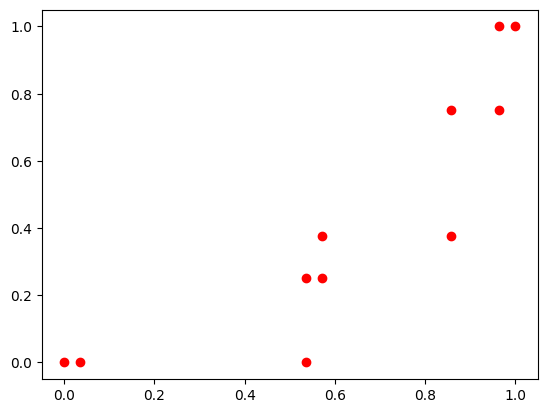

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión, recall y AUC
accuracy_sklearn.append( accuracy_score(y_test, y_pred))
precision_sklearn.append(precision_score(y_test, y_pred, average='weighted'))
recall_sklearn.append(recall_score(y_test, y_pred, average='weighted'))
auc_sklearn.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))

print(accuracy_sklearn[0])
print(precision_sklearn[0])
print(recall_sklearn[0])
print(auc_sklearn[0])


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
plt.scatter(fpr, tpr, color='red')

### Regresión Logística Notas de Arquitectura de Computadores 1 Sklearn

### Regresión Logística Propio Sklearn

### Árboles de decisión Red Wine Quality

Precisión del modelo de árbol de decisiones: 0.64
0
0
0


/home/guillen/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


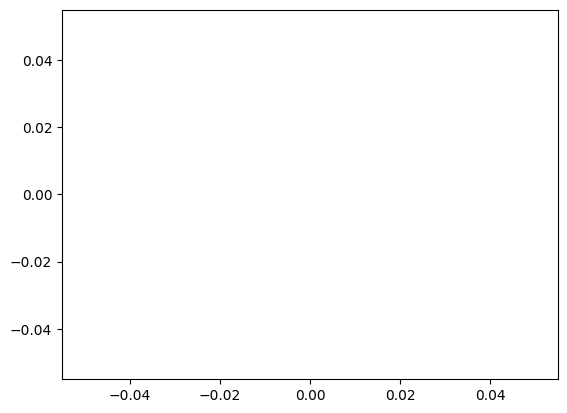

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
# Definir el porcentaje de datos para el conjunto de entrenamiento
train_size = 0.8

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1)
# Crear un objeto de árbol de decisiones
tree = DecisionTreeClassifier(random_state=1)

# Ajustar el modelo al conjunto de entrenamiento
tree.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Calcular la precisión del modelo
accuracy = tree.score(X_test, y_test)
print(f'Precisión del modelo de árbol de decisiones: {accuracy:.2f}')


# Calcular la precisión, recall y AUC
accuracy_sklearn.append( accuracy_score(y_test, y_pred))
precision_sklearn.append(precision_score(y_test, y_pred, average='weighted'))
recall_sklearn.append(recall_score(y_test, y_pred, average='weighted'))
#auc_sklearn.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))

print(accuracy_sklearn[1])
print(precision_sklearn[1])
print(recall_sklearn[1])
#print(auc_sklearn[1])


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plt.scatter(fpr, tpr, color='red')

### Árboles de decisión Notas de Arquitectura de Computadores 1 Sklearn

### Árboles de decisión Propio Sklearn

### KNN Red Wine Quality Sklearn

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64
Precisión del algoritmo KNN: 0.64
0
0
0


/home/guillen/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


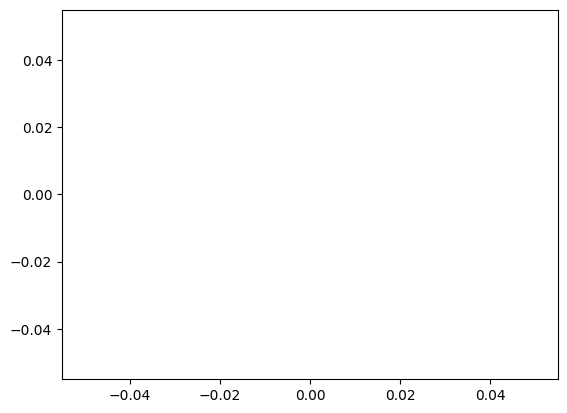

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

data['quality'] = np.where(data['quality'] > 5, 1, 0)  # Convertir la calidad en un problema de clasificación binaria
print(data['quality'])


# Definir el porcentaje de datos para el conjunto de entrenamiento
train_size = 0.8

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1)
# Crear un objeto de clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustar el clasificador KNN al conjunto de entrenamiento
knn.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)


# Calcular la precisión del algoritmo KNN
accuracy = knn.score(X_test, y_test)
print(f'Precisión del algoritmo KNN: {accuracy:.2f}')

#-------------------------------------------------------------------------------------------------
# Calcular las métricas de evaluación
# Calcular la precisión, recall y AUC
accuracy_sklearn.append( accuracy_score(y_test, y_pred))
precision_sklearn.append(precision_score(y_test, y_pred, average='weighted'))
recall_sklearn.append(recall_score(y_test, y_pred, average='weighted'))
#auc_sklearn.append(roc_auc_score(y_test, y_pred, multi_class='ovr'))

print(accuracy_sklearn[2])
print(precision_sklearn[2])
print(recall_sklearn[2])
#print(auc_sklearn[2])

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plt.scatter(fpr, tpr, color='red')

### KNN Notas de Arquitectura de Computadores 1 Sklearn

### KNN Propio Sklearn

## Tabla Comparativa

In [ ]:
k_values=[0,1,2]

accuracy = [0,0,0,0,0,0,0,0,0]
precision = [0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0]
auc = [0,0,0,0,0,0,0,0,0]

accuracy_sklearn = [0,0,0,0,0,0,0,0,0]
precision_sklearn = [0,0,0,0,0,0,0,0,0]
recall_sklearn = [0,0,0,0,0,0,0,0,0]
auc_sklearn = [0,0,0,0,0,0,0,0,0]

print("Comparación de datos y algoritmos")
accuracy_data = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall,
  "AUC": auc,
  "Accuracy_sklearn": accuracy_sklearn,
  "Precision_sklearn": precision_sklearn,
  "Recall_sklearn": recall_sklearn,
  "AUC_sklearn": auc_sklearn
}
pd.DataFrame( accuracy_data,index = ["Regresión Logística: Red wine Quality", "Regresión Logística: Notas Arqui", "Regresión Logística: Propio", 
                                             "Árboles de decisión: Red wine Quality", "Árboles de decisión: Notas Arqui", "Árboles de decisión: Propio", 
                                             "KNN: Red wine Quality", "KNN: Notas Arqui", "KNN: Propio"])

Comparación de datos y algoritmos


,Accuracy,Precision,Recall,AUC,Accuracy_sklearn,Precision_sklearn,Recall_sklearn,AUC_sklearn
Regresión Logística: Red wine Quality,0,0,0,0,0,0,0,0
Regresión Logística: Notas Arqui,0,0,0,0,0,0,0,0
Regresión Logística: Propio,0,0,0,0,0,0,0,0
Árboles de decisión: Red wine Quality,0,0,0,0,0,0,0,0
Árboles de decisión: Notas Arqui,0,0,0,0,0,0,0,0
Árboles de decisión: Propio,0,0,0,0,0,0,0,0
KNN: Red wine Quality,0,0,0,0,0,0,0,0
KNN: Notas Arqui,0,0,0,0,0,0,0,0
KNN: Propio,0,0,0,0,0,0,0,0


## Puntos Extra